# Purpose

This Colab collects all of the examples given in the documentation for [ergo](https://github.com/oughtinc/ergo).

If you're curious about any of the examples, you can run it or extend it here.

Note that each example is self-contained, so e.g. imports are repeated across examples.

# Setup

In [0]:
%%capture
%pip install --quiet poetry  # Fixes https://github.com/python-poetry/poetry/issues/532
%pip install --quiet git+https://github.com/oughtinc/ergo.git

# Examples

## metaculus.py -- predict on Harvard admisison question

In this example, we predict the admit rate for Harvard's class of 2029: 

https://www.metaculus.com/questions/3622

We predict that the admit rate will be 50% higher than the current community prediction.

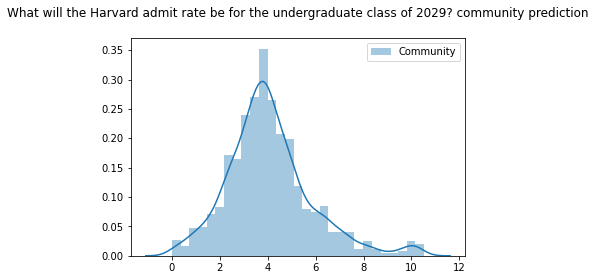

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


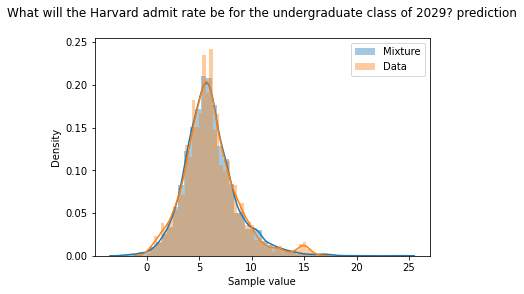

<Response [202]>

In [4]:
import ergo
import numpy as np

metaculus = ergo.Metaculus(username="", password="", api_domain="www")

harvard_question = metaculus.get_question(3622)
harvard_question.show_community_prediction()

community_prediction_samples = np.array([harvard_question.sample_community() for _ in range (0,5000)])
my_prediction_samples = community_prediction_samples * 1.5

harvard_question.show_submission(my_prediction_samples)
harvard_question.submit_from_samples(my_prediction_samples)